検出力  

母比率の検定をしたいとする  
帰無仮説H0を母比率PはP0(0.10)であるとする  
有意水準α=0.05で検定をしたい  
検出力1-β=0.90になるようにサンプルサイズを決定したい

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
# 有意水準、検出力、帰無仮説で設定した母比率P0、対立仮説で設定したい母比率Pを使って検出力を満たすサンプル数を返す
def calc_samplesize(alpha, power, P0, P):
    z_alpha = stats.norm.ppf(alpha/2) # 累積分布関数でalpha/2の確率になるときのz統計量を求める
    z_beta = stats.norm.ppf(power)
    A = np.sqrt( (P0*(1-P0)) / (P*(1-P)) )
    B = (P-P0) / np.sqrt(P*(1-P))

    n = ((z_alpha*A - z_beta) / B)**2
    #n2 = ((-z_alpha*A + z_beta) / B)**2
    return np.ceil(n)

def calc_power(alpha, P0, P, n):
    z_alpha = stats.norm.ppf(alpha/2) # 累積分布関数でalpha/2の確率になるときのz統計量を求める
    A = np.sqrt( (P0*(1-P0)) / (P*(1-P)) )
    B = (P-P0) / np.sqrt(P*(1-P)/n)
    x1 = z_alpha*A - B
    x2 = -z_alpha*A - B
    p1 = stats.norm.cdf(x1) # x1以下になる確率を求める
    p2 = 1-stats.norm.cdf(x2) # x2以上になる確率を求める
    return p1+p2

In [46]:
P0 = 0.10 # 帰無仮説H0：母比率は0.10である　
P = 0.15
alpha = 0.05 # 有意水準α
power = 0.90 # 検出力1-β

calc_samplesize(alpha, power, P0, P)

438.0

In [47]:
P0 = 0.10 # 帰無仮説H0：母比率は0.10である　
alpha = 0.05 # 有意水準α
power = 0.90 # 検出力1-β
n = 200 # サンプルサイズ

calc_power(alpha, P0, P, n)

0.7076556826350969

対立仮説H1で設定するPの値によってサンプルサイズnがどう変化するか

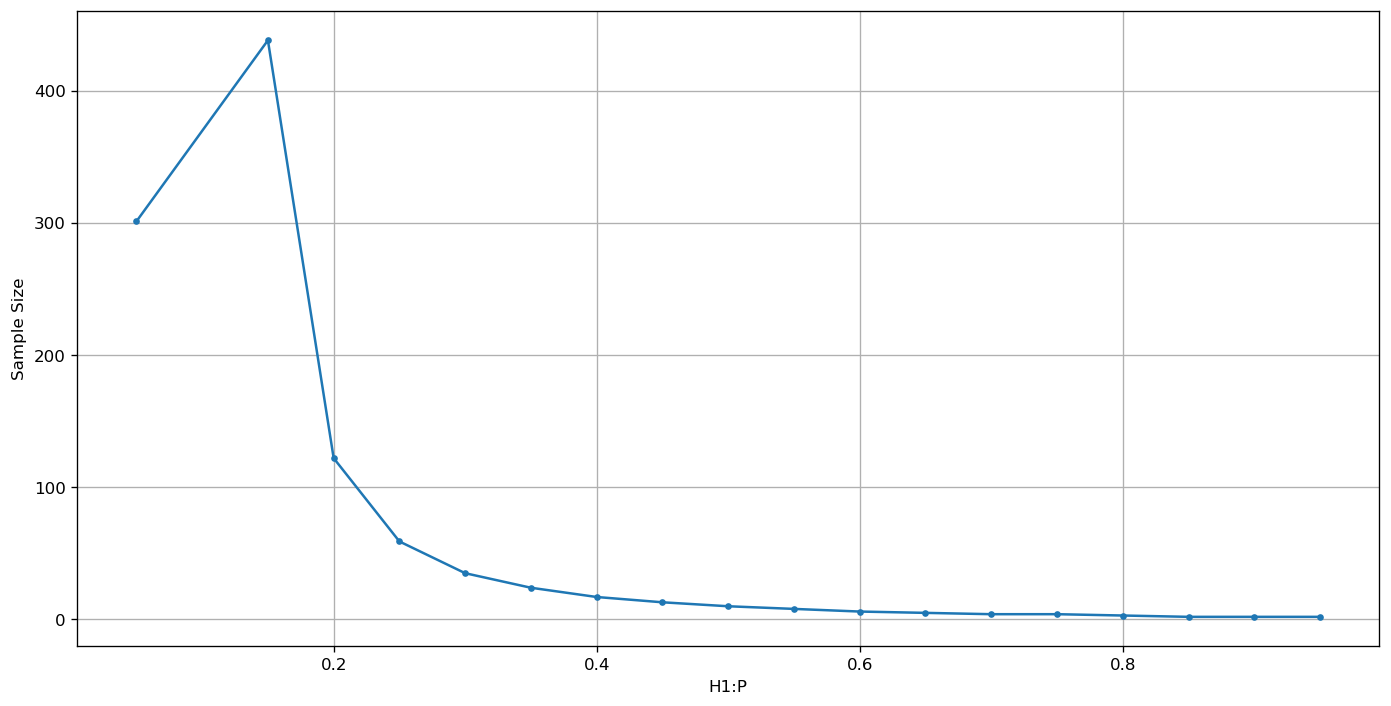

In [64]:
P0 = 0.10 # 帰無仮説H0：母比率は0.10である　
alpha = 0.05 # 有意水準α
power = 0.90 # 検出力1-β
Plist = [p for p in np.arange(0.05, 1.00, 0.05) if p!=P0]

ns = [calc_samplesize(alpha, power, P0, p) for p in Plist]

fig = plt.figure(figsize=(14, 7), dpi=120)
ax = fig.add_subplot(111)
ax.plot(Plist, ns, marker='.')
ax.set_xlabel("H1:P")
ax.set_ylabel("Sample Size")
plt.grid()
plt.show()
plt.close()

サンプルサイズnによって検出力がどう変化するか

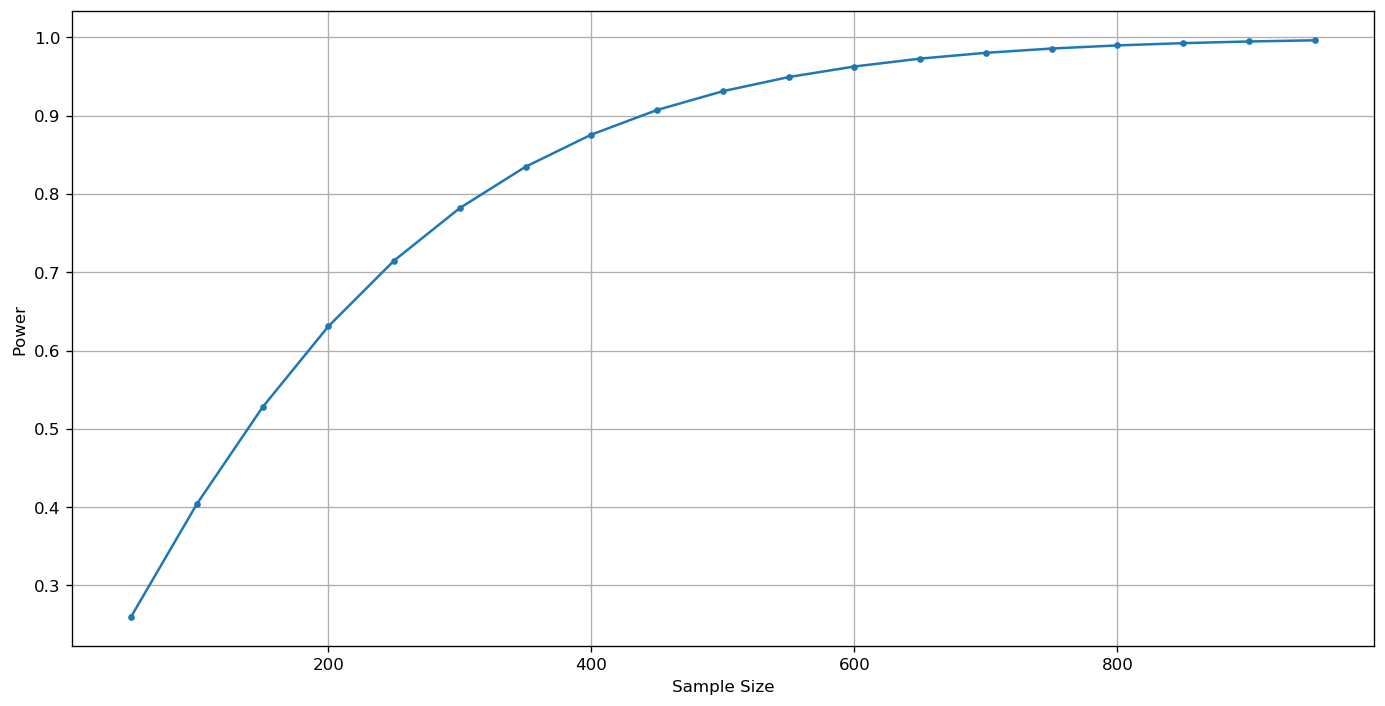

In [69]:
P0 = 0.10 # 帰無仮説H0：母比率は0.10である　
P = 0.15
alpha = 0.05 # 有意水準α
nlist = [n for n in np.arange(50, 1000, 50)]
powers = [calc_power(alpha, P0, P, n) for n in nlist]

fig = plt.figure(figsize=(14, 7), dpi=120)
ax = fig.add_subplot(111)
ax.plot(nlist, powers, marker='.')
ax.set_xlabel("Sample Size")
ax.set_ylabel("Power")
plt.grid()
plt.show()
plt.close()